In [244]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pickle.load(open("data.p", "rb"))
print("data loaded")

data loaded


In [10]:
#data

In [70]:
imprisonment = []
detention = []
suspended = []
fines = []
for cases in data:
    for decision in cases:
        decision_lst = list(decision.keys())
        for penalty in decision_lst:
#             print(penalty)
#             print(decision[penalty])
#             print(penalty == "有期徒刑")
            if (penalty == "免予处罚") and (decision[penalty]):
                pass
            elif penalty == "有期徒刑":
                imprisonment.append(decision[penalty])
            elif penalty == "罚金":
                fines.append(decision[penalty])
            elif penalty == "缓刑":
                suspended.append(decision[penalty])
            elif penalty == "拘役":
                detention.append(decision[penalty])
print(imprisonment)
print()
print(detention)
print()
print(suspended)
print()
print(fines)

['六个月', '十个月', '一年', '八个月', '六个月', '八个月', '六个月', '十个月', '八个月', '六个月', '一年', '十一个月', '九个月', '九个月', '六个月', '四年六个月', '三年', '四年', '二年', '二年', '二年', '二年', '二年', '一年六个月', '一年', '一年', '六个月', '一年', '二年', '九个月', '六个月', '七个月', '一年', '一年', '六个月', '九个月', '七个月', '八个月', '十个月', '十个月', '六个月', '六个月', '一年六个月', '一年二个月', '十个月', '一年', '六个月', '八个月', '六个月', '一年', '一年六个月', '八个月', '八个月', '六个月', '一年', '一年', '十个月', '六个月', '六个月', '六个月', '一年二个月', '一年', '八个月', '十个月', '一年六个月', '一年六个月', '一年零六个月', '六个月', '四年六个月', '四年三个月', '四年', '四年五个月', '一年一个月', '一年', '五年', '四年六个月', '四年六个月', '十个月', '六个月', '一年', '一年', '一年六个月', '一年', '一年', '一年', '一年', '八个月', '八个月', '七个月', '一年', '十一个月', '十一个月', '十一个月', '十一个月', '一年六个月', '七个月', '二年', '一年', '六个月', '十个月', '一年', '七个月', '一年零六个月', '七个月', '六个月', '一年四个月', '一年', '一年', '六个月', '一年', '六个月', '一年', '一年六个月', '一年', '十个月', '十个月', '一年', '十个月', '一年二个月', '八个月', '二年', '一年缓刑一年六个月', '十个月缓刑一年三个月', '十个月', '八个月', '二年', '十个月', '二年', '九个月', '六个月', '六个月', '六个月', '八个月', '二年六个月', '一年六个月', '十个月', '六个月缓刑一年', '一年二个月', '一年

In [14]:
# TODO: Modify each penalty to the same standard output

In [149]:
p = {"o":1, "m":2}
g = {"e":3, "v":4}
p.update(g)
p

{'o': 1, 'm': 2, 'e': 3, 'v': 4}

In [220]:
# create character number to int number dictionary
char = ["零", "一", "二", "三", "四", "五", "六", "七", "八", "九", "十"]
char_sub = ["壹", "贰", "叁", "肆", "伍", "陆", "柒", "捌", "玖", "拾"]
char_num = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
char2num_sub = dict([(value, key+1) for key, value in dict(enumerate(char_sub)).items()])
char2num = dict([(value, key) for key, value in dict(enumerate(char)).items()])
char2num_num = dict([(value, key) for key, value in dict(enumerate(char_num)).items()])
char2num["两"] = 2
char2num["万"] = 10000
char2num["千"] = 1000
char2num["仟"] = 1000
char2num["百"] = 100
char2num.update(char2num_sub)
char2num.update(char2num_num)
char2num

{'零': 0,
 '一': 1,
 '二': 2,
 '三': 3,
 '四': 4,
 '五': 5,
 '六': 6,
 '七': 7,
 '八': 8,
 '九': 9,
 '十': 10,
 '两': 2,
 '万': 10000,
 '千': 1000,
 '仟': 1000,
 '百': 100,
 '壹': 1,
 '贰': 2,
 '叁': 3,
 '肆': 4,
 '伍': 5,
 '陆': 6,
 '柒': 7,
 '捌': 8,
 '玖': 9,
 '拾': 10,
 '0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10}

In [123]:
def find_year_month(i):
    year_num, month_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[1]
        else:
            decision = i
        if ("年" in decision) and ("月" in decision):
            # convert string to list, and iterate the list to find year number
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]

            # same idea as above, find month number
            month_char = decision.split("年")[1].split("月")[0]
            month_char = month_char.split("个")[0]
            for j in list(month_char):
                month_num += char2num[j]
        elif ("年" in decision) and ("月" not in decision):
            year_char = decision.split("年")[0]
            if len(year_char) > 1:
                raise ValueError('year_char is more then 10 years')
            for k in list(year_char):
                year_num += char2num[k]
        elif ("年" not in decision) and ("月" in decision):
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            # handle string integer
            try:
                month_num = int(month_char)
            except:
                for j in list(month_char):
                    month_num += char2num[j]
    except:
        pass
    return {'year':year_num, 'month':month_num}

In [129]:
fines

['人民币一千元',
 '人民币五千元',
 '五千元',
 '人民币二万五千元',
 '人民币六千元',
 '三万元',
 '二万元',
 '二万元',
 '20000元',
 '人民币八万元',
 '人民币二万元',
 '人民币二万元',
 '人民币七万元',
 '人民币三万元',
 '人民币五万元',
 '人民币四万五千元',
 '人民币四万元',
 '人民币四万元',
 '人民币二万元',
 '人民币8000000元',
 '人民币200000元',
 '人民币100000元',
 '人民币200000元',
 '人民币50000元',
 '人民币50000元',
 '人民币50000元',
 '人民币50000元',
 '人民币100000元',
 '人民币五万元',
 '人民币二万元',
 '人民币20000元',
 '人民币一万元',
 '人民币一万元',
 '六万元',
 '3000元',
 '人民币30000元',
 '人民币10000元',
 '人民币6000元',
 '人民币4000元',
 '人民币一万元',
 '人民币三万元',
 '人民币三千元',
 '人民币一千元',
 '人民币一千元',
 '人民币十二万元',
 '人民币4000元',
 '人民币三万元',
 '人民币二万元',
 '8000元',
 '人民币六万元',
 '人民币一万元',
 '人民币一万元',
 '人民币五千元',
 '人民币二万元',
 '人民币四万元',
 '人民币三万元',
 '人民币一万元',
 '人民币一万元',
 '人民币二万元',
 '人民币一万元',
 '人民币五千元',
 '100000元',
 '30000元',
 '20000元',
 '20000元',
 '人民币七万元',
 '于本判决生效次日缴纳',
 '3000元',
 '人民币贰拾万元',
 '人民币肆万元',
 '人民币伍万元',
 '人民币壹万元',
 '人民币6000元',
 '人民币2000元',
 '一万元',
 '人民币三万元',
 '人民币二万元',
 '人民币八万元',
 '人民币20000元',
 '人民币15000元',
 '人民币一万五千元',
 '人民币一万五千元',
 '人民币二万元',
 '人民币二万元',
 '人民币一万元',
 '人民币三千元',
 '

In [119]:
def find_detention(i):
    month_num, day_num = 0, 0
    try:
        if "缓刑" in i:
            decision = i.split("缓刑")[0]
        else:
            decision = i
        if "月" in decision:
            # convert string to list, and iterate the list to find month number
            month_char = decision.split("月")[0]
            month_char = month_char.split("个")[0]
            for k in list(month_char):
                month_num += char2num[k]
                
            # same idea as above, find day number
            if "天" in decision:
                day_char = decision.split("月")[1].split("天")[0]
                for j in list(day_char):
                    day_num += char2num[j]
            elif "日" in decision:
                day_char = decision.split("月")[1].split("日")[0]
                for j in list(day_char):
                    day_num += char2num[j]
        elif ("天" in decision) and ("月" not in decision):
            day_char = decision.split("月")[1].split("天")[0]
            for j in list(day_char):
                day_num += char2num[j]
        elif ("日" in decision) and ("月" not in decision):
            day_char = day_char.split("日")[0]
            for j in list(day_char):
                day_num += char2num[j]
#             # handle integer string
#             try:
#                 month_num = int(month_char)
#             except:
#                 for j in list(month_char):
#                     month_num += char2num[j]
    except:
        pass
    return {'month':month_num, 'day':day_num}

In [230]:
# chinese2digits credit to zhengdan66
def chinese2digits(uchars_chinese):
    total = 0
    r = 1 
    for i in range(len(uchars_chinese) - 1, -1, -1):
        val = char2num.get(uchars_chinese[i])
        if val >= 10 and i == 0:  
            if val > r:
                r = val
                total = total + val
            else:
                r = r * val
                # total =total + r * x
        elif val >= 10:
            if val > r:
                r = val
            else:
                r = r * val
        else:
            total = total + r * val
    return total

def find_fines(i):
    fine_num = 0
    if "元" in i:
        if "人民币" in i:
            fine_char = i.split("人民币")[1]
        elif "人民" in i:
            fine_char = i.split("人民")[1]
        elif "共计" in i:
            fine_char = i.split("共计")[1]
        else:
            fine_char = i
        fine_char = fine_char.split("元")[0]
        # handle integer string
        try:
            fine_num = int(fine_char)
        except:
            if "," in fine_char:
                fine_char = fine_char.split(",")
                fine_char = "".join(fine_char)
            if "." in fine_char:
                fine_char = fine_char.split(".")[0]
            fine_num = chinese2digits(fine_char)
    else:
        pass
    return {"fine":fine_num}

In [238]:
detention_result = []
for i in detention:
    m = find_detention(i)
    if (m['day'] != 0) or (m['month'] != 0):
        detention_result.append(m)
detention_result

[{'month': 4, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 2, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 6, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 5, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 2, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 1, 'day': 12},
 {'month': 1, 'day': 12},
 {'month': 6, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 4, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 3, 'day': 0},
 {'month': 3, 'day': 0}

In [155]:
suspended_result = []
for i in suspended:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        suspended_result.append(m)
#suspended_result

In [156]:
imprisonment_result = []
for i in imprisonment:
    m = find_year_month(i)
    if (m['year'] != 0) or (m['month'] != 0):
        imprisonment_result.append(m)
#imprisonment_result

In [231]:
fines_result = []
for i in fines:
    m = find_fines(i)
    if m['fine'] != 0:
        fines_result.append(m)
#fines_result

[{'fine': 1000},
 {'fine': 5000},
 {'fine': 5000},
 {'fine': 25000},
 {'fine': 6000},
 {'fine': 30000},
 {'fine': 20000},
 {'fine': 20000},
 {'fine': 20000},
 {'fine': 80000},
 {'fine': 20000},
 {'fine': 20000},
 {'fine': 70000},
 {'fine': 30000},
 {'fine': 50000},
 {'fine': 45000},
 {'fine': 40000},
 {'fine': 40000},
 {'fine': 20000},
 {'fine': 8000000},
 {'fine': 200000},
 {'fine': 100000},
 {'fine': 200000},
 {'fine': 50000},
 {'fine': 50000},
 {'fine': 50000},
 {'fine': 50000},
 {'fine': 100000},
 {'fine': 50000},
 {'fine': 20000},
 {'fine': 20000},
 {'fine': 10000},
 {'fine': 10000},
 {'fine': 60000},
 {'fine': 3000},
 {'fine': 30000},
 {'fine': 10000},
 {'fine': 6000},
 {'fine': 4000},
 {'fine': 10000},
 {'fine': 30000},
 {'fine': 3000},
 {'fine': 1000},
 {'fine': 1000},
 {'fine': 20000},
 {'fine': 4000},
 {'fine': 30000},
 {'fine': 20000},
 {'fine': 8000},
 {'fine': 60000},
 {'fine': 10000},
 {'fine': 10000},
 {'fine': 5000},
 {'fine': 20000},
 {'fine': 40000},
 {'fine': 30000},

In [232]:
print(len(fines_result))
print(len(fines))

10794
11110


---
## Data analysis

In [241]:
# convert all dict list to numerical list
y = []
m = []
d = []
imprisonment_arr = []
detention_arr = []
suspended_arr = []
for c in imprisonment_result:
    y.append(c['year'])
    m.append(c['month'])
    imprisonment_arr.append(c['year'] * 12 + c['month'])
imprisonment_arr = np.array(imprisonment_arr)

for c in detention_result:
    d.append(c['day'])
    m.append(c['month'])
    detention_arr.append(c['month'] * 30 + c['day'])
detention_arr = np.array(detention_arr)

for c in suspended_result:
    y.append(c['year'])
    m.append(c['month'])
    suspended_arr.append(c['year'] * 12 + c['month'])
suspended_arr = np.array(suspended_arr)

fine_arr = np.array([i['fine'] for i in fines_result])
all_arr = [imprisonment_arr, detention_arr, suspended_arr, fine_arr]

In [246]:
i_stats_result = []
total_stats_result = []
for i_arr in all_arr:
    i_max = np.max(i_arr)
    i_min = np.min(i_arr)
    i_mean = np.mean(i_arr)
    i_median = np.median(i_arr)
    i_mode = stats.mode(i_arr)
    i_stats_result = [i_max, i_min, i_mean, i_median, i_mode]
    total_stats_result.append(i_stats_result)
total_stats_result
df = pd.DataFrame(np.array(total_stats_result),columns=['max', 'min', 'mean', 'median', 'mode'])
df

,max,min,mean,median,mode
0,120,4,12.3266,10,"([12], [1768])"
1,180,30,130.359,120,"([150], [446])"
2,60,2,16.2945,12,"([12], [1761])"
3,10080500000,1,971777,10000,"([10000], [2490])"


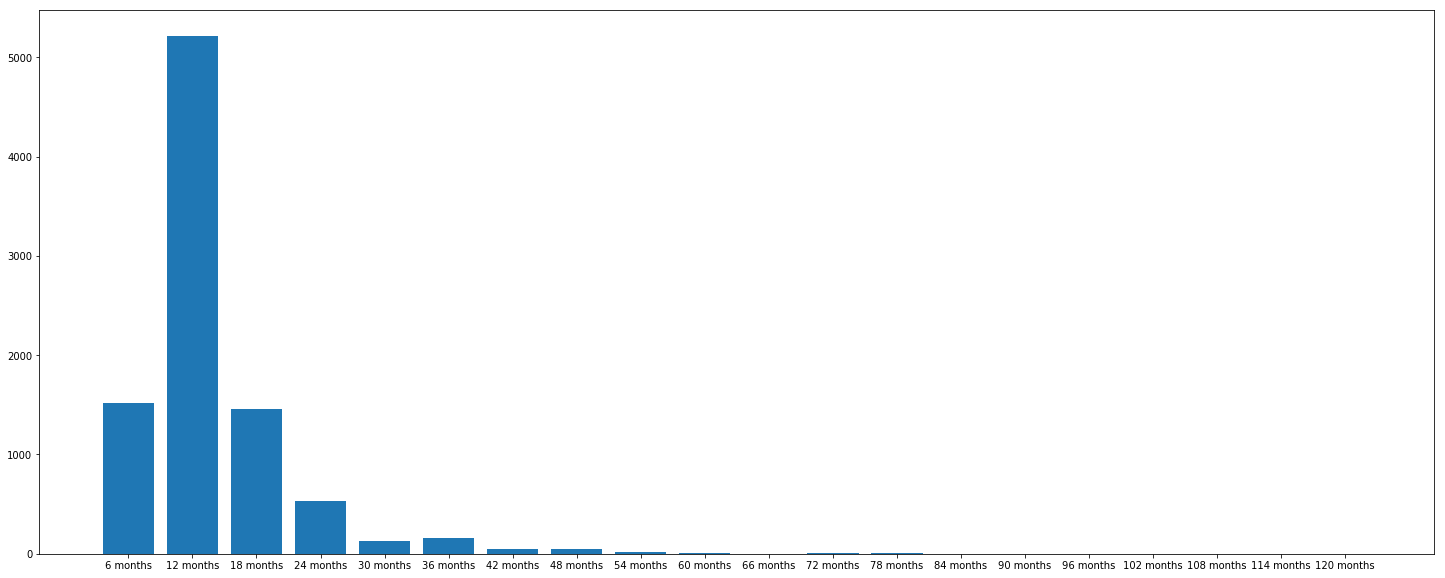

In [116]:
imprisonment_label = ["6 months", "12 months", "18 months", "24 months", "30 months",
                      "36 months", "42 months", "48 months", "54 months", "60 months", 
                      "66 months", "72 months", "78 months", "84 months", "90 months", 
                      "96 months", "102 months", "108 months","114 months", "120 months"]
imprisonment_value = []
for i in range(1, 21):
    imprisonment_value.append(len([n for n in total_imprisonment if n <= i*6 and n > (i-1)*6]))
plt.figure(figsize=(25, 10))
plt.bar(imprisonment_label, imprisonment_value)
plt.show()
print(imprisonment_value)


In [100]:
[n for n in range(20) if n%2 != 0 and n > 3]

[5, 7, 9, 11, 13, 15, 17, 19]

In [84]:
# find empty entries
count = 0
faulty = []
for m in result:
    if (m['year'] == 0) and (m['month'] == 0):
        faulty.append(count)
        print(count)
    count += 1